# Analiza podatkov

Podatki so zbrani iz spletne strani [AMZS](https://www.amzs.si/na-poti/Potovalne-informacije-po-evropskih-drzavah).

Dodatne informacije o projektu in navodila najdete v [README.md](https://github.com/PinoPavlin/CeneKazniEvropskihDrzav/blob/main/README.md).

## Priprava knjižnic in osnovnih nastavitev

Najprej uvozimo programa [tabela_csv.py](https://github.com/PinoPavlin/PrviRepozitorij/blob/main/tabela_csv.py) in [pretvori_v_EUR.py](https://github.com/PinoPavlin/PrviRepozitorij/blob/main/pretvori_v_EUR.py), s katerima dobimo dostop tudi do glavnega programa [pridobi_podatke_podstrani.py](https://github.com/PinoPavlin/PrviRepozitorij/blob/main/pridobi_podatke_podstrani.py), ki iz [spletne strani](https://www.amzs.si/na-poti/Potovalne-informacije-po-evropskih-drzavah) pobere podatke za vse evropske države.

In [ ]:
from tabela_csv import *
from pretvori_v_EUR import *
from grafi import *

## Pridobivanje podatkov za posamezno državo

Spodnja tabela prikaže podatke o valuti in cenah štirih različnih kazni za poljubno evropsko državo.

Te kazni so:
- **Vožnja pod vplivom alkohola**           (v tabeli označeno kot alkohol)
- **Prehitra vožnja v naselju za 20 km/h**  (v tabeli označeno kot voznja)
- **Neuporaba varnostnega pasu**            (v tabeli označeno kot pas)
- **Uporaba mobilnega telefona**            (v tabeli označeno kot telefon)

V našem primeru so prikazani podatki za Slovenijo.

In [2]:
import pandas as pd

testna_drzava = "slovenija"
slovar = pridobi_kazni_za_drzavo(testna_drzava)
df = pd.DataFrame(list(slovar.items()), columns=["",""], index=["","","","","",""])
df

,,
,drzava,Slovenija
,valuta,EUR
,alkohol,300 - 1.200
,voznja,120 + 3 točke
,pas,120
,telefon,250 + 3 točke


## Analiza osnovne .csv datoteke

V spodnji tabeli so prikazani podatki za **vse** evropske države.

_Ker pa v nekaterih državah ne uporabljajo valute EUR, je za lažjo predstavo potrebno poskrbeti tudi za to (v nadaljevanju)._

In [3]:
tabela = pd.read_csv("kazni_evropske_drzave.csv")
tabela

,Država,Valuta,Kazni za alkohol,Kazni za prehitro vožnjo,Kazni za varnostni pas,Kazni za mobilni telefon
0,Albanija,ALL,5.000 - 15.000,2.000 - 6.000,5.000,5.000
1,Andora,EUR,do 600,24,20 na neprivezano osebo,NaN
2,Avstrija,EUR,300 - 5.900,35 - 726,35 - 72,50 - 72
3,Belgija,EUR,150 - 16.000,160,116,116
4,Belorusija,BYN,1.225 - 2.450,"24,5","24,5",49
5,BIH,BAM,50 - 1000,50,100 - 300,100 - 300
6,Bolgarija,BGN,500 - 1000,20 - 600,50,50
7,Češka,CZK,2.500 - 50.000,2.500 - 5.000,1.500 - 2.500,1.500 - 2.500
8,Črna Gora,EUR,70 - 2.000,60 - 150,40 - 100,60 - 150
9,Danska,DKK,na podlagi mesečnega dohodka,3.500,1.500,1.500


## Analiza .csv datoteke z minimalnimi cenami kazni

Kot je razvidno iz zgornje (osnovne) tabele, niso vse cene fiksne (npr. "5.000 - 15.000"), nekatere so celo ubesedene (npr. "na podlagi mesečnega dohodka").

To sem rešil tako, da sem za vsako državo vzel zgolj minimalno ceno kazni, za države z ubesedeno kaznijo ali pa so brez podatka sem napisal ceno 0. (**Glej** [**Opozorila 1 in 2**](https://github.com/PinoPavlin/CeneKazniEvropskihDrzav/tree/main?tab=readme-ov-file#opozorila-) **v** [**README.md**](https://github.com/PinoPavlin/CeneKazniEvropskihDrzav/blob/main/README.md))

To predstavlja spodnja tabela:

In [4]:
minimum_tabela = pd.read_csv("kazni_evropske_drzave_minimum.csv")
minimum_tabela

,Država,Valuta,Min kazni za alkohol,Min kazni za prehitro vožnjo,Min kazni za varnostni pas,Min kazni za mobilni telefon
0,Albanija,ALL,5.000,2.000,5.000,5.000
1,Andora,EUR,600,24,20,0
2,Avstrija,EUR,300,35,35,50
3,Belgija,EUR,150,160,116,116
4,Belorusija,BYN,1.225,"24,5","24,5",49
5,BIH,BAM,50,50,100,100
6,Bolgarija,BGN,500,20,50,50
7,Češka,CZK,2.500,2.500,1.500,1.500
8,Črna Gora,EUR,70,60,40,60
9,Danska,DKK,0,3.500,1.500,1.500


## Funkcija za pretvorbo kazni v EUR

Vemo, da določene evropske države nimajo EUR za valuto, zato je za lažjo predstavo in uporabo dobro pretvoriti ceno v EUR. To naredi spodnja celica.

In [5]:
testna_cena = "100"
testna_valuta = "HUF"
pretvorjena_cena = pretvori_v_eur(testna_cena, testna_valuta)
f"Pretvorjena cena: {pretvorjena_cena} EUR"

'Pretvorjena cena: 0.2 EUR'

## Analiza .csv datoteke s pretvorjenimi cenami v EUR

Podatki v [kazni_evropske_drzave_minimum.csv](https://github.com/PinoPavlin/PrviRepozitorij/blob/main/kazni_evropske_drzave_minimum.csv) so dokaj neuporabni, saj verjetno ne poznamo pretvorb za vse valute v EUR.

V ta namen spodnja tabela prikazuje minimalne cene vseh kazni za evropske države v EUR.

Glej [**Opozorilo 7**](https://github.com/PinoPavlin/CeneKazniEvropskihDrzav/tree/main#:~:text=V%20datotekah%20kazni_evropske_drzave_eur.csv%20in%20kazni_evropske_drzave_eur_sortirano.csv%20je%20kljub%20pretvorbi%20v%20EUR%20%C5%A1e%20vedno%20zapisana%20mati%C4%8Dna%20valuta%20dr%C5%BEave.) za zapis valute v tabeli!

In [6]:
pretvorjeno_tabela = pd.read_csv("kazni_evropske_drzave_eur.csv")
pretvorjeno_tabela

,Država,Valuta,Min kazni za alkohol (EUR),Min kazni za prehitro vožnjo (EUR),Min kazni za varnostni pas (EUR),Min kazni za mobilni telefon (EUR)
0,Albanija,ALL,50.00,20.00,50.00,50.00
1,Andora,EUR,600.00,24.00,20.00,0.00
2,Avstrija,EUR,300.00,35.00,35.00,50.00
3,Belgija,EUR,150.00,160.00,116.00,116.00
4,Belorusija,BYN,344.23,6.88,6.88,13.77
5,BIH,BAM,25.55,25.55,51.10,51.10
6,Bolgarija,BGN,255.50,10.22,25.55,25.55
7,Češka,CZK,97.50,97.50,58.50,58.50
8,Črna Gora,EUR,70.00,60.00,40.00,60.00
9,Danska,DKK,0.00,469.00,201.00,201.00


## Analiza .csv datoteke s sortiranimi cenami

Za še lažjo predstavo spodnja tabela prikaže države urejene po ceni kazni za neuporabo varnostnega pasu padajoče (seveda vse v EUR).

In [7]:
sortirano_tabela = pd.read_csv("kazni_evropske_drzave_eur_sortirano.csv")
sortirano_tabela

,Država,Valuta,Min kazni za alkohol (EUR),Min kazni za prehitro vožnjo (EUR),Min kazni za varnostni pas (EUR),Min kazni za mobilni telefon (EUR)
0,V. Britanija,GBP,5990.00,1198.00,1198.00,1198.00
1,Grčija,EUR,78.00,100.00,350.00,100.00
2,Danska,DKK,0.00,469.00,201.00,201.00
3,Estonija,EUR,400.00,120.00,200.00,200.00
4,Španija,EUR,500.00,100.00,200.00,200.00
5,Nizozemska,EUR,300.00,240.00,180.00,420.00
6,Francija,EUR,135.00,135.00,135.00,135.00
7,Švedska,SEK,0.00,243.60,130.50,139.20
8,Hrvaška,EUR,90.00,130.00,130.00,130.00
9,Norveška,NOK,546.00,655.20,126.00,814.80


## Grafični prikaz kazni

Kot zanimivost in zaradi boljše preglednosti podatkov so v naslednjih programih iz [grafi.py](https://github.com/PinoPavlin/PrviRepozitorij/blob/main/grafi.py) prikazani grafi cen kazni za določene države.

Opazimo lahko, da ima **Španija** za vse 4 kazni izrazito visoke cene, predvsem za neuporabo varnostnega pasu, upoštevajoč, da so to zgolj minimalne cene.

**Slovenija** prav tako nima tako nizkih cen kazni, izstopa cena za **uporabo mobilnega telefona**.

Na drugi strani pa imata **Monako** in **Madžarska** dokaj nizke minimalne cene vseh kazni.

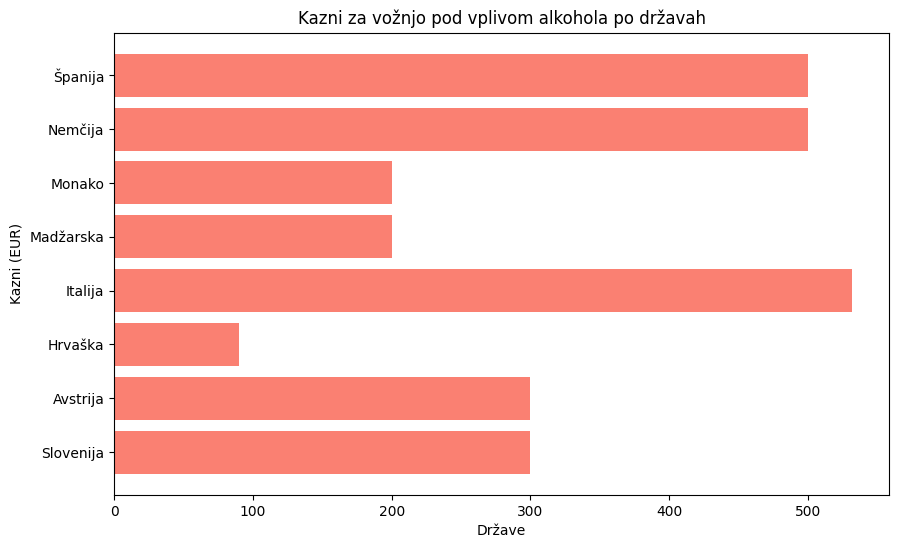

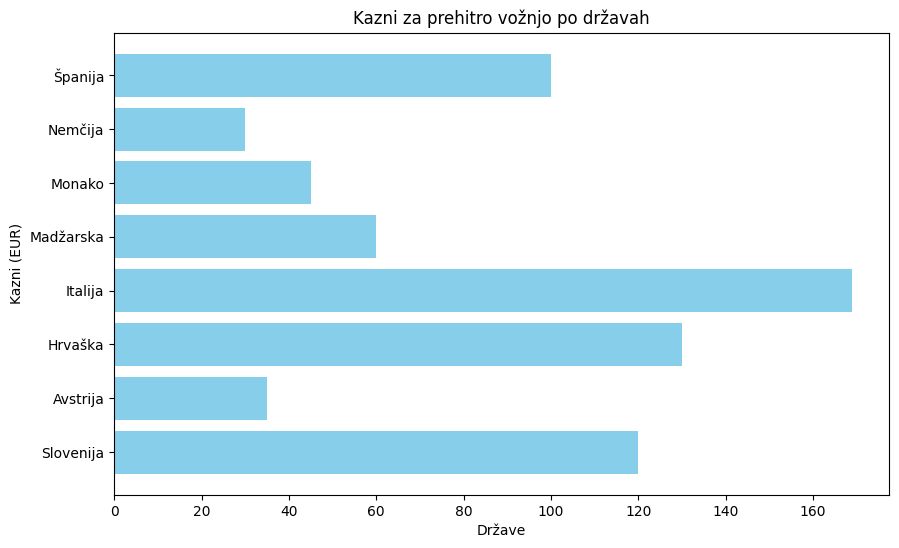

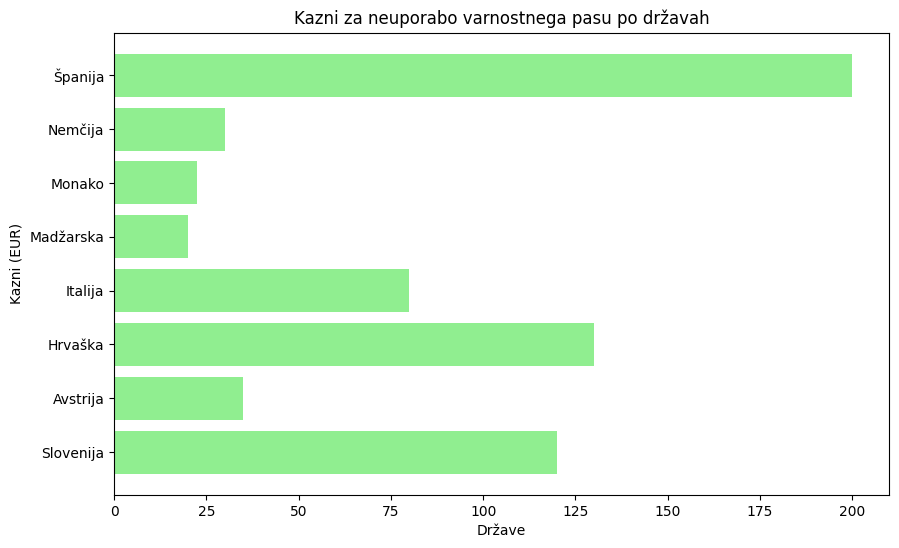

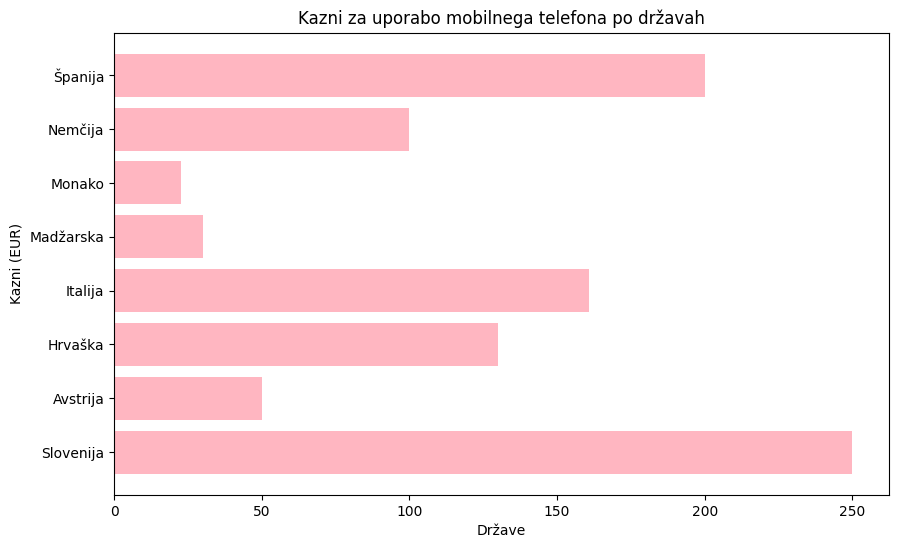

In [8]:
graf_alkohol()
graf_voznja()
graf_pasu()
graf_telefon()